In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns 
%matplotlib inline 

np.random.seed(0)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools 

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style = 'white', context = 'notebook', palette = 'deep')

### Loading our data ...


In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

### Extracting X_train and Y_train from train...

In [3]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"], axis = 1)
del train 

Y_train.value_counts()
X_train 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


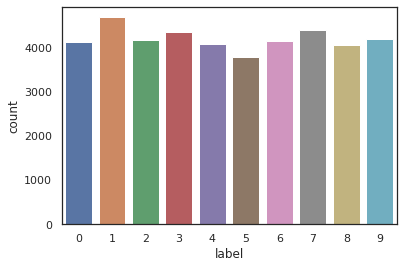

In [4]:
g = sns.countplot(Y_train)

### Checking for missing or null values ...

In [5]:
X_train.isnull().any().describe() 

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

It's Looking good no values are null or missing !

### Normalizing...

In [7]:
X_train = X_train / 255.0
test = test / 255.0
X_train.shape

(42000, 784)

### reshape into m x 28 x 28 x 1 shape needed for keras CNN

In [8]:
X_train = np.reshape(X_train.values, (-1, 28, 28, 1))
X_train.shape
test = np.reshape(test.values, (-1, 28, 28, 1))
test.shape

(28000, 28, 28, 1)

### encoding Labels into one hot vectors...

In [9]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Splitting Train dataset into train and dev(cross validation) set 

In [10]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = random_seed)
X_train.shape

(37800, 28, 28, 1)

### Visualising Our train data images...

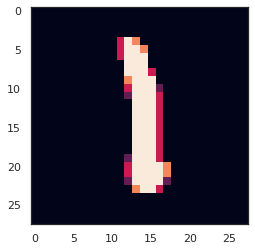

In [11]:
idx = 5
g = plt.imshow(X_train[idx][:,:,0])

### Definning the model !

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (5,5), activation = 'relu', padding = 'Same', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu', padding = 'Same'))
model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax' ))


### Setting an optimizer algorithm...

In [13]:
optimizer = RMSprop(lr = 0.001, decay = 0.0, epsilon = 1e-08)

### Compiling the model ! 

In [14]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

 ### reducing the learning rate dynamically 

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, verbose = 1, min_lr = 0.0001)

In [16]:
epochs = 30
batch_size = 86

#### Uncomment for fiting without data-aug, expecting 0.97-0.98 val_acc 

In [17]:
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 2, validation_data = (X_val ,Y_val))

# Data Augmentation
without data-aug we can expect a val_accuracy between 0.9790 and 0.98 depending on your number of epochs 
with data-aug we can do even better...

In [18]:
datagen = ImageDataGenerator (featurewise_center = False,
                              samplewise_center = False, 
                              featurewise_std_normalization = False,
                              samplewise_std_normalization = False,
                              zca_whitening=False,
                              rotation_range = 10,
                              zoom_range = 0.1,
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              horizontal_flip = False,
                              vertical_flip=False)
datagen.fit(X_train)

In [19]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),epochs = epochs,
 validation_data = (X_val, Y_val),verbose = 1,steps_per_epoch = X_train.shape[0] // batch_size,
                                           callbacks = [learning_rate_reduction])

Epoch 1/30
439/439 [==============================] - 137s 313ms/step - loss: 0.4674 - accuracy: 0.8484 - val_loss: 0.0594 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 2/30
439/439 [==============================] - 136s 310ms/step - loss: 0.1498 - accuracy: 0.9552 - val_loss: 0.0609 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 3/30
439/439 [==============================] - 146s 333ms/step - loss: 0.1064 - accuracy: 0.9679 - val_loss: 0.0300 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 4/30
439/439 [==============================] - 140s 318ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.0337 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 5/30
439/439 [==============================] - 136s 309ms/step - loss: 0.0754 - accuracy: 0.9769 - val_loss: 0.0397 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 6/30
439/439 [==============================] - 137s 312ms/step - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.0280 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 7/30
439/439 [==========================

# Evaluating the model...


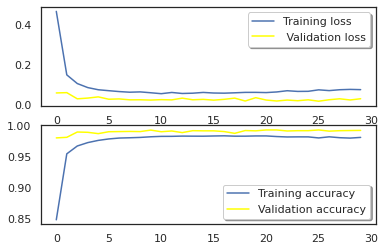

In [20]:
fig,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], label = "Training loss", color ="b")
ax[0].plot(history.history['val_loss'], label = " Validation loss", color ="yellow", axes = ax[0])
legend = ax[0].legend(loc = 'best', shadow =True)

ax[1].plot(history.history['accuracy'], label = "Training accuracy", color = 'b')
ax[1].plot(history.history['val_accuracy'], label = "Validation accuracy", color = 'yellow')
legend = ax[1].legend(loc = 'best', shadow =True)

#  Confusion Matrix...

In [21]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [22]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)